In [9]:
from lmcinc import lmcinc
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm as LN
from scipy.stats import binned_statistic_2d
from findinc import *
import corner
import emcee
import astropy.units as u

In [2]:
out1 = lmcinc(np.pi/2,0)

PARAM INPUTS
-----------------------------------------------------
Prog =  galsat6
Nbodies =  1
Tmin   =  1.0    Gyrs
Vcirc  =  220.0    km/s
Dhalo  =  13.0    kpc
Step   =  0.01
Ostep  =  1.0  Gyrs
Dstep  =  1.0  Gyrs
Using Milky Way Potential
Using Dynamical Friction
-----------------------------------------------------
 
Running GALSAT program ...
USING 1000 STARS

PARAM INPUTS
-----------------------------------------------------
XYZ    =  36.47818881318886  209.1858470951854  -62.38474184505181    kpc
VxVyVz =  -20.802750018241024  -195.4972130985367  -43.04758905919997    km/s
Soft   =  5.081594555957554    kpc
Mass   =  180000000000.0  Msun
-----------------------------------------------------
PARAM INPUTS
-----------------------------------------------------
Prog =  galsat6
Nbodies =  1001
Tmin   =  1.0    Gyrs
Vcirc  =  220.0    km/s
Dhalo  =  13.0    kpc
Step   =  0.001
Ostep  =  1.0  Gyrs
Dstep  =  1.0  Gyrs
Integrating FORWARDS
Using Milky Way Potential
Using Dynamical Fric

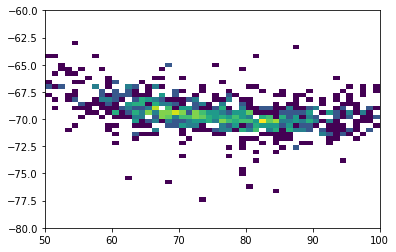

In [3]:
lbrange = [[50,100],[-80,-60]]
plt.hist2d(out1['RA'],out1['DEC'],norm=LN(),bins=50,range=lbrange)
plt.show()

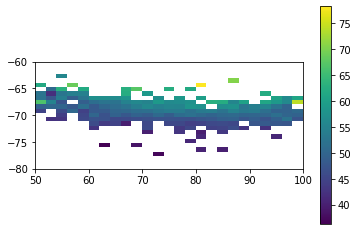

In [4]:
ret = binned_statistic_2d(out1['RA'],out1['DEC'],out1['DIST'],
                          statistic=np.mean,bins=25,
                          range=lbrange)
extent = lbrange[0]+lbrange[1]
plt.imshow(ret.statistic.T,origin='lower',extent=extent)
plt.colorbar()

In [2]:
help(emcee.EnsembleSampler)

Help on class EnsembleSampler in module emcee.ensemble:

class EnsembleSampler(builtins.object)
 |  EnsembleSampler(nwalkers, ndim, log_prob_fn, pool=None, moves=None, args=None, kwargs=None, backend=None, vectorize=False, blobs_dtype=None, parameter_names: Union[Dict[str, int], List[str], NoneType] = None, a=None, postargs=None, threads=None, live_dangerously=None, runtime_sortingfn=None)
 |  
 |  An ensemble MCMC sampler
 |  
 |  If you are upgrading from an earlier version of emcee, you might notice
 |  that some arguments are now deprecated. The parameters that control the
 |  proposals have been moved to the :ref:`moves-user` interface (``a`` and
 |  ``live_dangerously``), and the parameters related to parallelization can
 |  now be controlled via the ``pool`` argument (:ref:`parallel`).
 |  
 |  Args:
 |      nwalkers (int): The number of walkers in the ensemble.
 |      ndim (int): Number of dimensions in the parameter space.
 |      log_prob_fn (callable): A function that takes

In [20]:
ra = out1['RA']
dec = out1['DEC']
plx = out1['DIST']
plx_err = plx/100
labels = ['nodes','inclination','distance']

In [16]:
np.mean(out1['DIST'])

50.67991515324901

NameError: name 'utils' is not defined

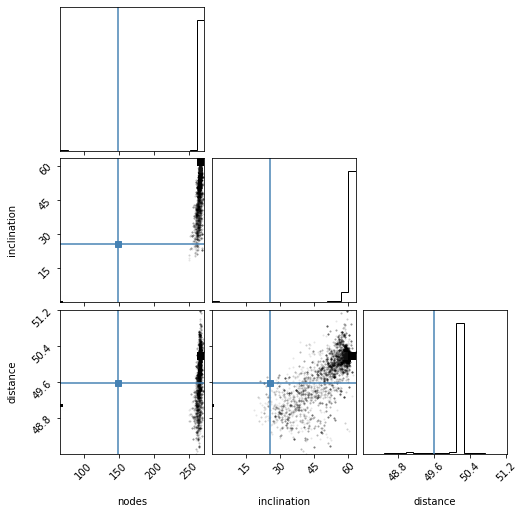

In [21]:
pa_y = 149.23 # line of nodes from Yumi 
io_y = 25.86 # inclination from Yumi 
d0_g = 49.59 # distance from Pietrzynski (2019)


#To run the MCMC:
guess = [pa_y, io_y, d0_g] #guess parameters

pos = guess + np.random.randn(100, 3) ## do each variable seperately with 100 walkers
nwalkers, ndim = pos.shape

sampler = emcee.EnsembleSampler(nwalkers, ndim, lnProb, args=(ra, dec, plx, plx_err))
sampler.run_mcmc(pos, 1000, progress=True); #1000 samples

#To create corner plot:
flat_samples = sampler.get_chain(discard=100, thin=1, flat=True)
corner.corner(flat_samples, labels=labels, truths=[pa_y, io_y, d0_g]);

#To print the results:
vals = [np.median(flat_samples[:,0]), np.median(flat_samples[:,1]), np.median(flat_samples[:,2])]
errs = [utils.mad(flat_samples[:,0]), utils.mad(flat_samples[:,1]), utils.mad(flat_samples[:,2])]

print('line of nodes: {} +/- {}'.format(vals[0], errs[0]))
print('inclination: {} +/- {}'.format(vals[1], errs[1]))
print('distance: {} +/- {}'.format(vals[2], errs[2]))

In [22]:
vals

[266.2014151570281, 60.31728357353184, 50.14957730747849]

PARAM INPUTS
-----------------------------------------------------
Prog =  galsat6
Nbodies =  1
Tmin   =  1.0    Gyrs
Vcirc  =  220.0    km/s
Dhalo  =  13.0    kpc
Step   =  0.01
Ostep  =  1.0  Gyrs
Dstep  =  1.0  Gyrs
Using Milky Way Potential
Using Dynamical Friction
-----------------------------------------------------
 
Running GALSAT program ...
USING 1000 STARS

PARAM INPUTS
-----------------------------------------------------
XYZ    =  36.47818881318886  209.1858470951854  -62.38474184505181    kpc
VxVyVz =  -20.802750018241024  -195.4972130985367  -43.04758905919997    km/s
Soft   =  5.081594555957554    kpc
Mass   =  180000000000.0  Msun
-----------------------------------------------------
PARAM INPUTS
-----------------------------------------------------
Prog =  galsat6
Nbodies =  1001
Tmin   =  1.0    Gyrs
Vcirc  =  220.0    km/s
Dhalo  =  13.0    kpc
Step   =  0.001
Ostep  =  1.0  Gyrs
Dstep  =  1.0  Gyrs
Integrating FORWARDS
Using Milky Way Potential
Using Dynamical Fric

USING 1000 STARS

PARAM INPUTS
-----------------------------------------------------
XYZ    =  36.47818881318886  209.1858470951854  -62.38474184505181    kpc
VxVyVz =  -20.802750018241024  -195.4972130985367  -43.04758905919997    km/s
Soft   =  5.081594555957554    kpc
Mass   =  180000000000.0  Msun
-----------------------------------------------------
PARAM INPUTS
-----------------------------------------------------
Prog =  galsat6
Nbodies =  1001
Tmin   =  1.0    Gyrs
Vcirc  =  220.0    km/s
Dhalo  =  13.0    kpc
Step   =  0.001
Ostep  =  1.0  Gyrs
Dstep  =  1.0  Gyrs
Integrating FORWARDS
Using Milky Way Potential
Using Dynamical Friction
-----------------------------------------------------
 
Running GALSAT program ...


USING 1000 STARS

PARAM INPUTS
-----------------------------------------------------
XYZ    =  36.47818881318886  209.1858470951854  -62.38474184505181    kpc
VxVyVz =  -20.802750018241024  -195.4972130985367  -43.04758905919997    km/s
Soft   =  5.081594555957554    kpc
Mass   =  180000000000.0  Msun
-----------------------------------------------------
PARAM INPUTS
-----------------------------------------------------
Prog =  galsat6
Nbodies =  1001
Tmin   =  1.0    Gyrs
Vcirc  =  220.0    km/s
Dhalo  =  13.0    kpc
Step   =  0.001
Ostep  =  1.0  Gyrs
Dstep  =  1.0  Gyrs
Integrating FORWARDS
Using Milky Way Potential
Using Dynamical Friction
-----------------------------------------------------
 
Running GALSAT program ...


USING 1000 STARS

PARAM INPUTS
-----------------------------------------------------
XYZ    =  36.47818881318886  209.1858470951854  -62.38474184505181    kpc
VxVyVz =  -20.802750018241024  -195.4972130985367  -43.04758905919997    km/s
Soft   =  5.081594555957554    kpc
Mass   =  180000000000.0  Msun
-----------------------------------------------------
PARAM INPUTS
-----------------------------------------------------
Prog =  galsat6
Nbodies =  1001
Tmin   =  1.0    Gyrs
Vcirc  =  220.0    km/s
Dhalo  =  13.0    kpc
Step   =  0.001
Ostep  =  1.0  Gyrs
Dstep  =  1.0  Gyrs
Integrating FORWARDS
Using Milky Way Potential
Using Dynamical Friction
-----------------------------------------------------
 
Running GALSAT program ...


USING 1000 STARS

PARAM INPUTS
-----------------------------------------------------
XYZ    =  36.47818881318886  209.1858470951854  -62.38474184505181    kpc
VxVyVz =  -20.802750018241024  -195.4972130985367  -43.04758905919997    km/s
Soft   =  5.081594555957554    kpc
Mass   =  180000000000.0  Msun
-----------------------------------------------------
PARAM INPUTS
-----------------------------------------------------
Prog =  galsat6
Nbodies =  1001
Tmin   =  1.0    Gyrs
Vcirc  =  220.0    km/s
Dhalo  =  13.0    kpc
Step   =  0.001
Ostep  =  1.0  Gyrs
Dstep  =  1.0  Gyrs
Integrating FORWARDS
Using Milky Way Potential
Using Dynamical Friction
-----------------------------------------------------
 
Running GALSAT program ...


USING 1000 STARS

PARAM INPUTS
-----------------------------------------------------
XYZ    =  36.47818881318886  209.1858470951854  -62.38474184505181    kpc
VxVyVz =  -20.802750018241024  -195.4972130985367  -43.04758905919997    km/s
Soft   =  5.081594555957554    kpc
Mass   =  180000000000.0  Msun
-----------------------------------------------------
PARAM INPUTS
-----------------------------------------------------
Prog =  galsat6
Nbodies =  1001
Tmin   =  1.0    Gyrs
Vcirc  =  220.0    km/s
Dhalo  =  13.0    kpc
Step   =  0.001
Ostep  =  1.0  Gyrs
Dstep  =  1.0  Gyrs
Integrating FORWARDS
Using Milky Way Potential
Using Dynamical Friction
-----------------------------------------------------
 
Running GALSAT program ...


USING 1000 STARS

PARAM INPUTS
-----------------------------------------------------
XYZ    =  36.47818881318886  209.1858470951854  -62.38474184505181    kpc
VxVyVz =  -20.802750018241024  -195.4972130985367  -43.04758905919997    km/s
Soft   =  5.081594555957554    kpc
Mass   =  180000000000.0  Msun
-----------------------------------------------------
PARAM INPUTS
-----------------------------------------------------
Prog =  galsat6
Nbodies =  1001
Tmin   =  1.0    Gyrs
Vcirc  =  220.0    km/s
Dhalo  =  13.0    kpc
Step   =  0.001
Ostep  =  1.0  Gyrs
Dstep  =  1.0  Gyrs
Integrating FORWARDS
Using Milky Way Potential
Using Dynamical Friction
-----------------------------------------------------
 
Running GALSAT program ...


USING 1000 STARS

PARAM INPUTS
-----------------------------------------------------
XYZ    =  36.47818881318886  209.1858470951854  -62.38474184505181    kpc
VxVyVz =  -20.802750018241024  -195.4972130985367  -43.04758905919997    km/s
Soft   =  5.081594555957554    kpc
Mass   =  180000000000.0  Msun
-----------------------------------------------------
PARAM INPUTS
-----------------------------------------------------
Prog =  galsat6
Nbodies =  1001
Tmin   =  1.0    Gyrs
Vcirc  =  220.0    km/s
Dhalo  =  13.0    kpc
Step   =  0.001
Ostep  =  1.0  Gyrs
Dstep  =  1.0  Gyrs
Integrating FORWARDS
Using Milky Way Potential
Using Dynamical Friction
-----------------------------------------------------
 
Running GALSAT program ...


USING 1000 STARS

PARAM INPUTS
-----------------------------------------------------
XYZ    =  36.47818881318886  209.1858470951854  -62.38474184505181    kpc
VxVyVz =  -20.802750018241024  -195.4972130985367  -43.04758905919997    km/s
Soft   =  5.081594555957554    kpc
Mass   =  180000000000.0  Msun
-----------------------------------------------------
PARAM INPUTS
-----------------------------------------------------
Prog =  galsat6
Nbodies =  1001
Tmin   =  1.0    Gyrs
Vcirc  =  220.0    km/s
Dhalo  =  13.0    kpc
Step   =  0.001
Ostep  =  1.0  Gyrs
Dstep  =  1.0  Gyrs
Integrating FORWARDS
Using Milky Way Potential
Using Dynamical Friction
-----------------------------------------------------
 
Running GALSAT program ...


USING 1000 STARS

PARAM INPUTS
-----------------------------------------------------
XYZ    =  36.47818881318886  209.1858470951854  -62.38474184505181    kpc
VxVyVz =  -20.802750018241024  -195.4972130985367  -43.04758905919997    km/s
Soft   =  5.081594555957554    kpc
Mass   =  180000000000.0  Msun
-----------------------------------------------------
PARAM INPUTS
-----------------------------------------------------
Prog =  galsat6
Nbodies =  1001
Tmin   =  1.0    Gyrs
Vcirc  =  220.0    km/s
Dhalo  =  13.0    kpc
Step   =  0.001
Ostep  =  1.0  Gyrs
Dstep  =  1.0  Gyrs
Integrating FORWARDS
Using Milky Way Potential
Using Dynamical Friction
-----------------------------------------------------
 
Running GALSAT program ...


USING 1000 STARS

PARAM INPUTS
-----------------------------------------------------
XYZ    =  36.47818881318886  209.1858470951854  -62.38474184505181    kpc
VxVyVz =  -20.802750018241024  -195.4972130985367  -43.04758905919997    km/s
Soft   =  5.081594555957554    kpc
Mass   =  180000000000.0  Msun
-----------------------------------------------------
PARAM INPUTS
-----------------------------------------------------
Prog =  galsat6
Nbodies =  1001
Tmin   =  1.0    Gyrs
Vcirc  =  220.0    km/s
Dhalo  =  13.0    kpc
Step   =  0.001
Ostep  =  1.0  Gyrs
Dstep  =  1.0  Gyrs
Integrating FORWARDS
Using Milky Way Potential
Using Dynamical Friction
-----------------------------------------------------
 
Running GALSAT program ...


USING 1000 STARS

PARAM INPUTS
-----------------------------------------------------
XYZ    =  36.47818881318886  209.1858470951854  -62.38474184505181    kpc
VxVyVz =  -20.802750018241024  -195.4972130985367  -43.04758905919997    km/s
Soft   =  5.081594555957554    kpc
Mass   =  180000000000.0  Msun
-----------------------------------------------------
PARAM INPUTS
-----------------------------------------------------
Prog =  galsat6
Nbodies =  1001
Tmin   =  1.0    Gyrs
Vcirc  =  220.0    km/s
Dhalo  =  13.0    kpc
Step   =  0.001
Ostep  =  1.0  Gyrs
Dstep  =  1.0  Gyrs
Integrating FORWARDS
Using Milky Way Potential
Using Dynamical Friction
-----------------------------------------------------
 
Running GALSAT program ...


USING 1000 STARS

PARAM INPUTS
-----------------------------------------------------
XYZ    =  36.47818881318886  209.1858470951854  -62.38474184505181    kpc
VxVyVz =  -20.802750018241024  -195.4972130985367  -43.04758905919997    km/s
Soft   =  5.081594555957554    kpc
Mass   =  180000000000.0  Msun
-----------------------------------------------------
PARAM INPUTS
-----------------------------------------------------
Prog =  galsat6
Nbodies =  1001
Tmin   =  1.0    Gyrs
Vcirc  =  220.0    km/s
Dhalo  =  13.0    kpc
Step   =  0.001
Ostep  =  1.0  Gyrs
Dstep  =  1.0  Gyrs
Integrating FORWARDS
Using Milky Way Potential
Using Dynamical Friction
-----------------------------------------------------
 
Running GALSAT program ...


USING 1000 STARS

PARAM INPUTS
-----------------------------------------------------
XYZ    =  36.47818881318886  209.1858470951854  -62.38474184505181    kpc
VxVyVz =  -20.802750018241024  -195.4972130985367  -43.04758905919997    km/s
Soft   =  5.081594555957554    kpc
Mass   =  180000000000.0  Msun
-----------------------------------------------------
PARAM INPUTS
-----------------------------------------------------
Prog =  galsat6
Nbodies =  1001
Tmin   =  1.0    Gyrs
Vcirc  =  220.0    km/s
Dhalo  =  13.0    kpc
Step   =  0.001
Ostep  =  1.0  Gyrs
Dstep  =  1.0  Gyrs
Integrating FORWARDS
Using Milky Way Potential
Using Dynamical Friction
-----------------------------------------------------
 
Running GALSAT program ...


USING 1000 STARS

PARAM INPUTS
-----------------------------------------------------
XYZ    =  36.47818881318886  209.1858470951854  -62.38474184505181    kpc
VxVyVz =  -20.802750018241024  -195.4972130985367  -43.04758905919997    km/s
Soft   =  5.081594555957554    kpc
Mass   =  180000000000.0  Msun
-----------------------------------------------------
PARAM INPUTS
-----------------------------------------------------
Prog =  galsat6
Nbodies =  1001
Tmin   =  1.0    Gyrs
Vcirc  =  220.0    km/s
Dhalo  =  13.0    kpc
Step   =  0.001
Ostep  =  1.0  Gyrs
Dstep  =  1.0  Gyrs
Integrating FORWARDS
Using Milky Way Potential
Using Dynamical Friction
-----------------------------------------------------
 
Running GALSAT program ...


USING 1000 STARS

PARAM INPUTS
-----------------------------------------------------
XYZ    =  36.47818881318886  209.1858470951854  -62.38474184505181    kpc
VxVyVz =  -20.802750018241024  -195.4972130985367  -43.04758905919997    km/s
Soft   =  5.081594555957554    kpc
Mass   =  180000000000.0  Msun
-----------------------------------------------------
PARAM INPUTS
-----------------------------------------------------
Prog =  galsat6
Nbodies =  1001
Tmin   =  1.0    Gyrs
Vcirc  =  220.0    km/s
Dhalo  =  13.0    kpc
Step   =  0.001
Ostep  =  1.0  Gyrs
Dstep  =  1.0  Gyrs
Integrating FORWARDS
Using Milky Way Potential
Using Dynamical Friction
-----------------------------------------------------
 
Running GALSAT program ...


USING 1000 STARS

PARAM INPUTS
-----------------------------------------------------
XYZ    =  36.47818881318886  209.1858470951854  -62.38474184505181    kpc
VxVyVz =  -20.802750018241024  -195.4972130985367  -43.04758905919997    km/s
Soft   =  5.081594555957554    kpc
Mass   =  180000000000.0  Msun
-----------------------------------------------------
PARAM INPUTS
-----------------------------------------------------
Prog =  galsat6
Nbodies =  1001
Tmin   =  1.0    Gyrs
Vcirc  =  220.0    km/s
Dhalo  =  13.0    kpc
Step   =  0.001
Ostep  =  1.0  Gyrs
Dstep  =  1.0  Gyrs
Integrating FORWARDS
Using Milky Way Potential
Using Dynamical Friction
-----------------------------------------------------
 
Running GALSAT program ...


USING 1000 STARS

PARAM INPUTS
-----------------------------------------------------
XYZ    =  36.47818881318886  209.1858470951854  -62.38474184505181    kpc
VxVyVz =  -20.802750018241024  -195.4972130985367  -43.04758905919997    km/s
Soft   =  5.081594555957554    kpc
Mass   =  180000000000.0  Msun
-----------------------------------------------------
PARAM INPUTS
-----------------------------------------------------
Prog =  galsat6
Nbodies =  1001
Tmin   =  1.0    Gyrs
Vcirc  =  220.0    km/s
Dhalo  =  13.0    kpc
Step   =  0.001
Ostep  =  1.0  Gyrs
Dstep  =  1.0  Gyrs
Integrating FORWARDS
Using Milky Way Potential
Using Dynamical Friction
-----------------------------------------------------
 
Running GALSAT program ...


USING 1000 STARS

PARAM INPUTS
-----------------------------------------------------
XYZ    =  36.47818881318886  209.1858470951854  -62.38474184505181    kpc
VxVyVz =  -20.802750018241024  -195.4972130985367  -43.04758905919997    km/s
Soft   =  5.081594555957554    kpc
Mass   =  180000000000.0  Msun
-----------------------------------------------------
PARAM INPUTS
-----------------------------------------------------
Prog =  galsat6
Nbodies =  1001
Tmin   =  1.0    Gyrs
Vcirc  =  220.0    km/s
Dhalo  =  13.0    kpc
Step   =  0.001
Ostep  =  1.0  Gyrs
Dstep  =  1.0  Gyrs
Integrating FORWARDS
Using Milky Way Potential
Using Dynamical Friction
-----------------------------------------------------
 
Running GALSAT program ...


USING 1000 STARS

PARAM INPUTS
-----------------------------------------------------
XYZ    =  36.47818881318886  209.1858470951854  -62.38474184505181    kpc
VxVyVz =  -20.802750018241024  -195.4972130985367  -43.04758905919997    km/s
Soft   =  5.081594555957554    kpc
Mass   =  180000000000.0  Msun
-----------------------------------------------------
PARAM INPUTS
-----------------------------------------------------
Prog =  galsat6
Nbodies =  1001
Tmin   =  1.0    Gyrs
Vcirc  =  220.0    km/s
Dhalo  =  13.0    kpc
Step   =  0.001
Ostep  =  1.0  Gyrs
Dstep  =  1.0  Gyrs
Integrating FORWARDS
Using Milky Way Potential
Using Dynamical Friction
-----------------------------------------------------
 
Running GALSAT program ...


USING 1000 STARS

PARAM INPUTS
-----------------------------------------------------
XYZ    =  36.47818881318886  209.1858470951854  -62.38474184505181    kpc
VxVyVz =  -20.802750018241024  -195.4972130985367  -43.04758905919997    km/s
Soft   =  5.081594555957554    kpc
Mass   =  180000000000.0  Msun
-----------------------------------------------------
PARAM INPUTS
-----------------------------------------------------
Prog =  galsat6
Nbodies =  1001
Tmin   =  1.0    Gyrs
Vcirc  =  220.0    km/s
Dhalo  =  13.0    kpc
Step   =  0.001
Ostep  =  1.0  Gyrs
Dstep  =  1.0  Gyrs
Integrating FORWARDS
Using Milky Way Potential
Using Dynamical Friction
-----------------------------------------------------
 
Running GALSAT program ...


/home/bgarver/.local/lib/python3.8/site-packages/corner/core.py:95: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = pl.subplots(K, K, figsize=(dim, dim))


USING 1000 STARS

PARAM INPUTS
-----------------------------------------------------
XYZ    =  36.47818881318886  209.1858470951854  -62.38474184505181    kpc
VxVyVz =  -20.802750018241024  -195.4972130985367  -43.04758905919997    km/s
Soft   =  5.081594555957554    kpc
Mass   =  180000000000.0  Msun
-----------------------------------------------------
PARAM INPUTS
-----------------------------------------------------
Prog =  galsat6
Nbodies =  1001
Tmin   =  1.0    Gyrs
Vcirc  =  220.0    km/s
Dhalo  =  13.0    kpc
Step   =  0.001
Ostep  =  1.0  Gyrs
Dstep  =  1.0  Gyrs
Integrating FORWARDS
Using Milky Way Potential
Using Dynamical Friction
-----------------------------------------------------
 
Running GALSAT program ...


USING 1000 STARS

PARAM INPUTS
-----------------------------------------------------
XYZ    =  36.47818881318886  209.1858470951854  -62.38474184505181    kpc
VxVyVz =  -20.802750018241024  -195.4972130985367  -43.04758905919997    km/s
Soft   =  5.081594555957554    kpc
Mass   =  180000000000.0  Msun
-----------------------------------------------------
PARAM INPUTS
-----------------------------------------------------
Prog =  galsat6
Nbodies =  1001
Tmin   =  1.0    Gyrs
Vcirc  =  220.0    km/s
Dhalo  =  13.0    kpc
Step   =  0.001
Ostep  =  1.0  Gyrs
Dstep  =  1.0  Gyrs
Integrating FORWARDS
Using Milky Way Potential
Using Dynamical Friction
-----------------------------------------------------
 
Running GALSAT program ...


USING 1000 STARS

PARAM INPUTS
-----------------------------------------------------
XYZ    =  36.47818881318886  209.1858470951854  -62.38474184505181    kpc
VxVyVz =  -20.802750018241024  -195.4972130985367  -43.04758905919997    km/s
Soft   =  5.081594555957554    kpc
Mass   =  180000000000.0  Msun
-----------------------------------------------------
PARAM INPUTS
-----------------------------------------------------
Prog =  galsat6
Nbodies =  1001
Tmin   =  1.0    Gyrs
Vcirc  =  220.0    km/s
Dhalo  =  13.0    kpc
Step   =  0.001
Ostep  =  1.0  Gyrs
Dstep  =  1.0  Gyrs
Integrating FORWARDS
Using Milky Way Potential
Using Dynamical Friction
-----------------------------------------------------
 
Running GALSAT program ...


USING 1000 STARS

PARAM INPUTS
-----------------------------------------------------
XYZ    =  36.47818881318886  209.1858470951854  -62.38474184505181    kpc
VxVyVz =  -20.802750018241024  -195.4972130985367  -43.04758905919997    km/s
Soft   =  5.081594555957554    kpc
Mass   =  180000000000.0  Msun
-----------------------------------------------------
PARAM INPUTS
-----------------------------------------------------
Prog =  galsat6
Nbodies =  1001
Tmin   =  1.0    Gyrs
Vcirc  =  220.0    km/s
Dhalo  =  13.0    kpc
Step   =  0.001
Ostep  =  1.0  Gyrs
Dstep  =  1.0  Gyrs
Integrating FORWARDS
Using Milky Way Potential
Using Dynamical Friction
-----------------------------------------------------
 
Running GALSAT program ...


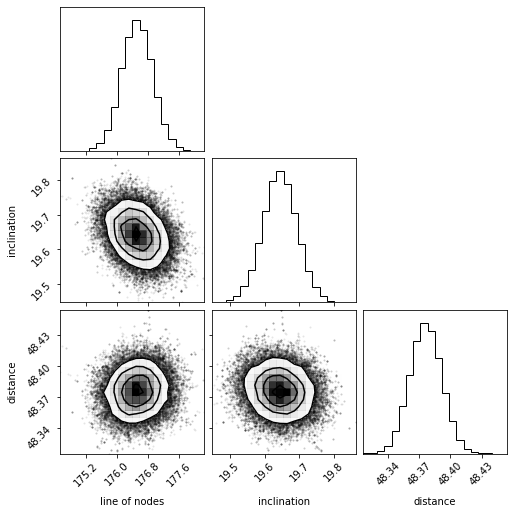

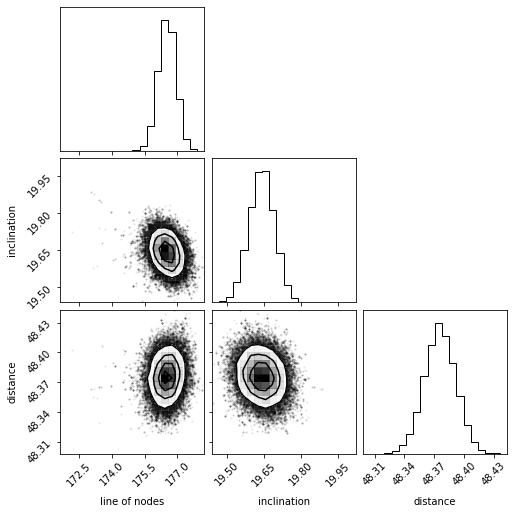

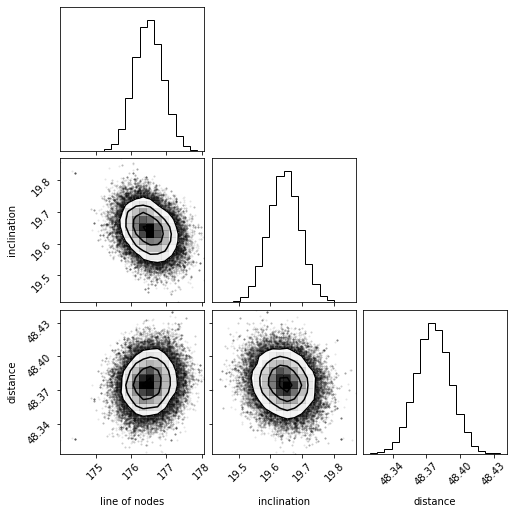

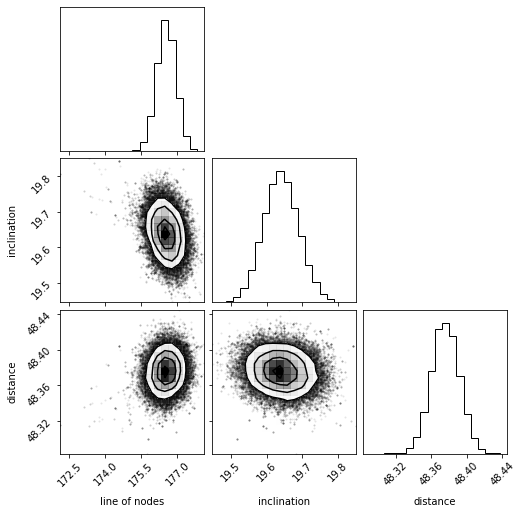

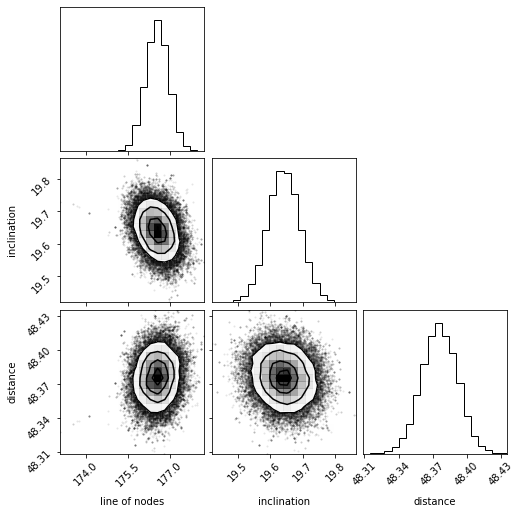

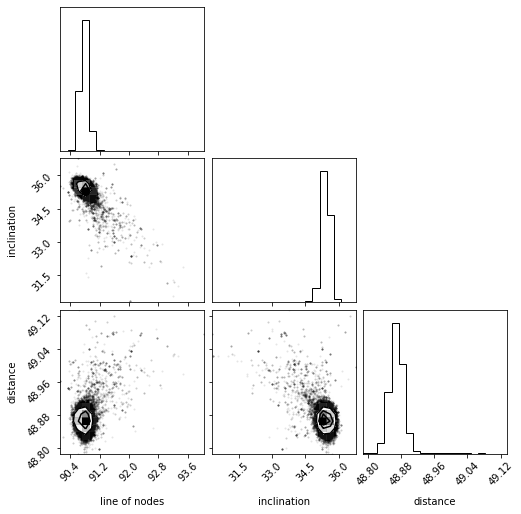

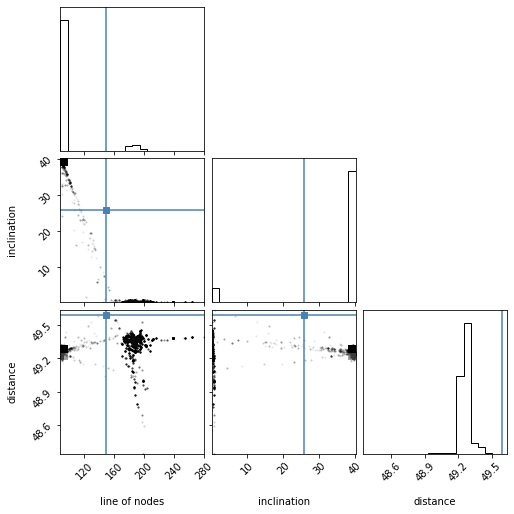

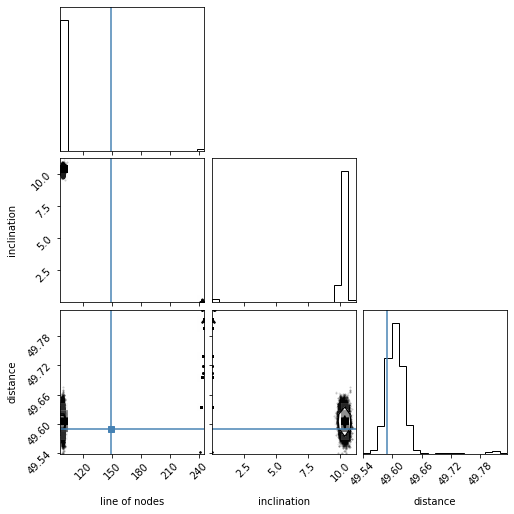

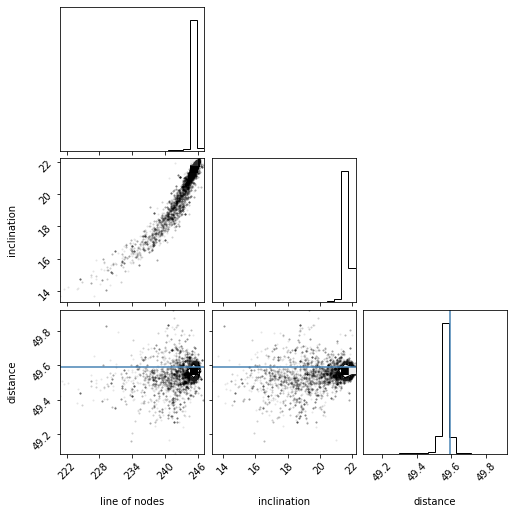

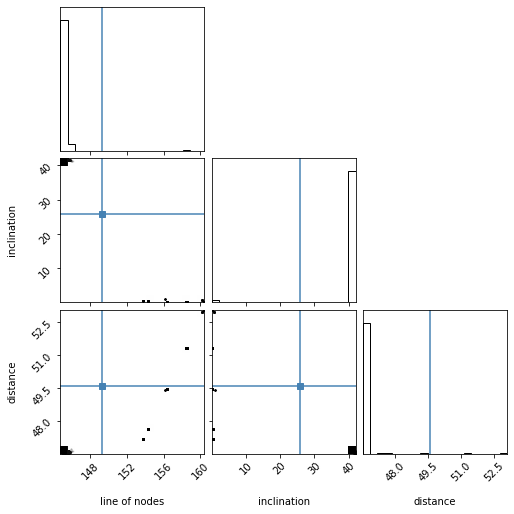

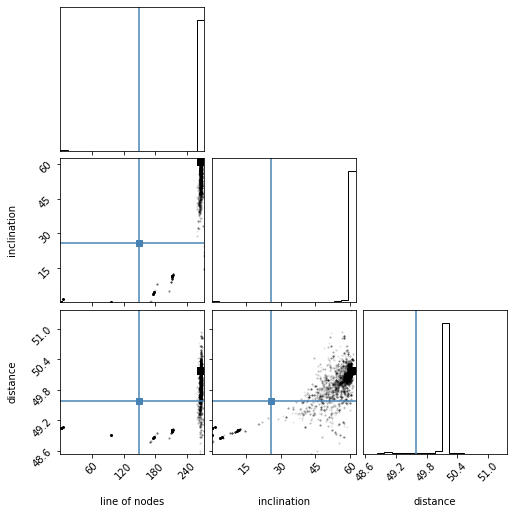

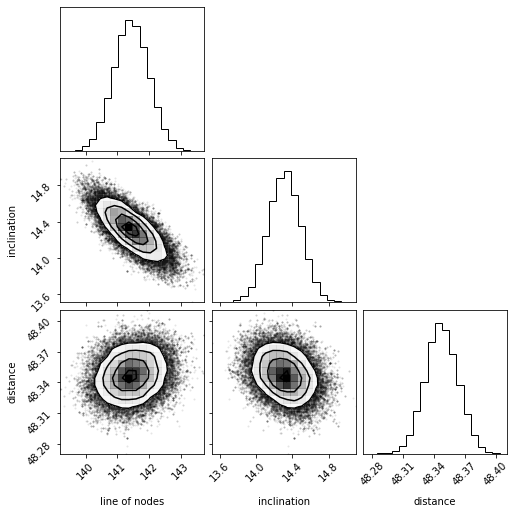

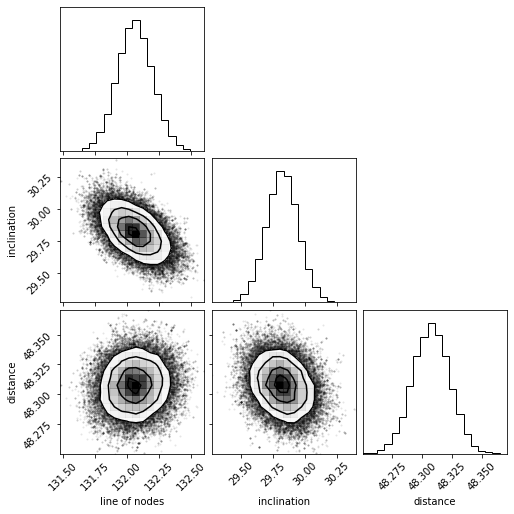

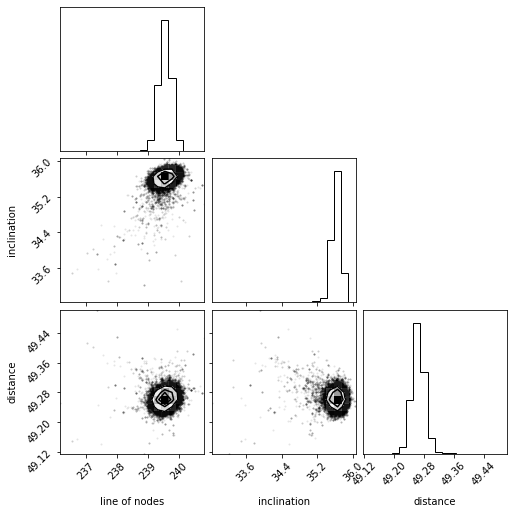

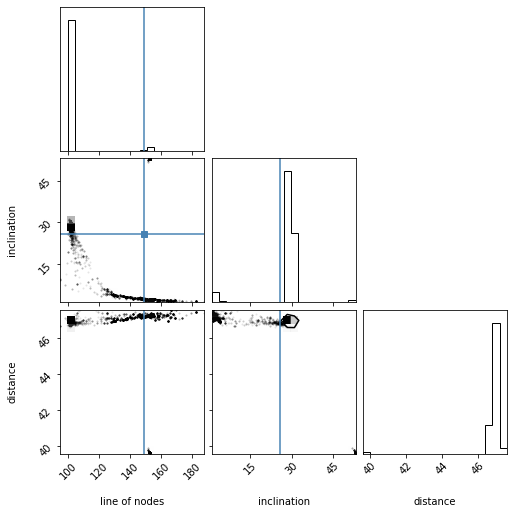

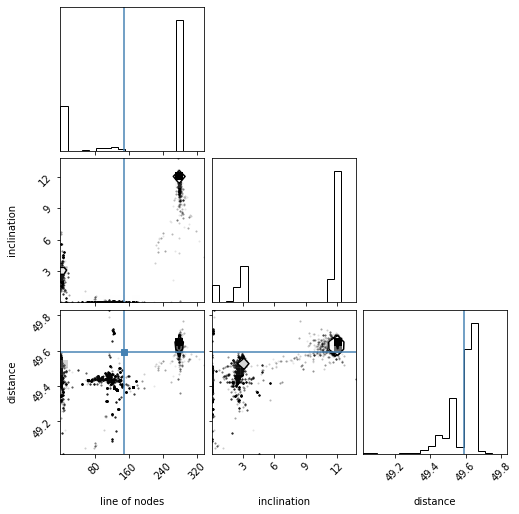

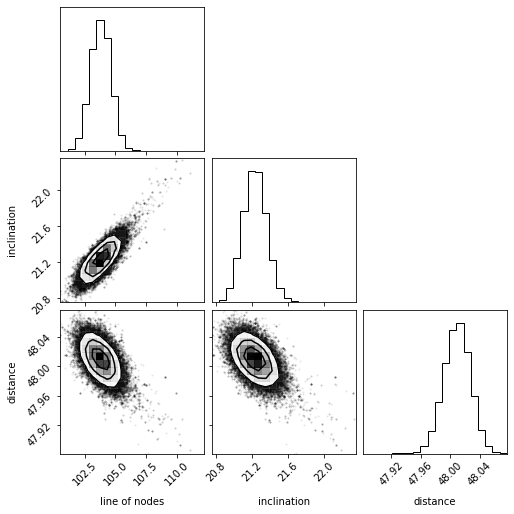

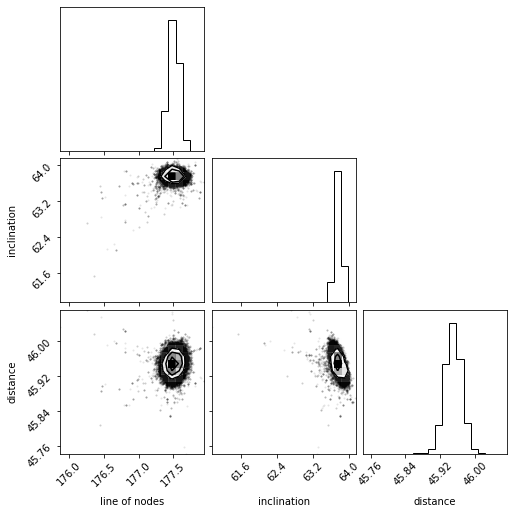

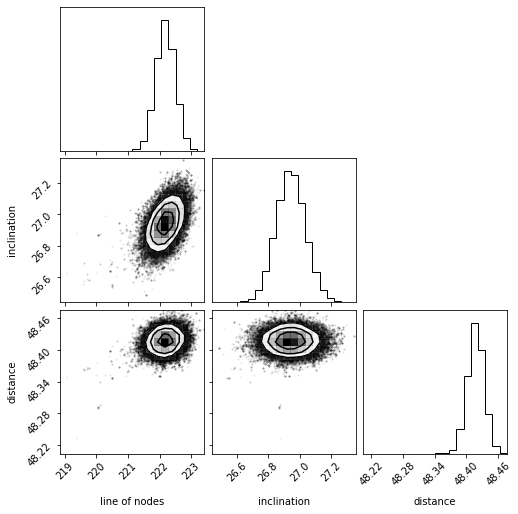

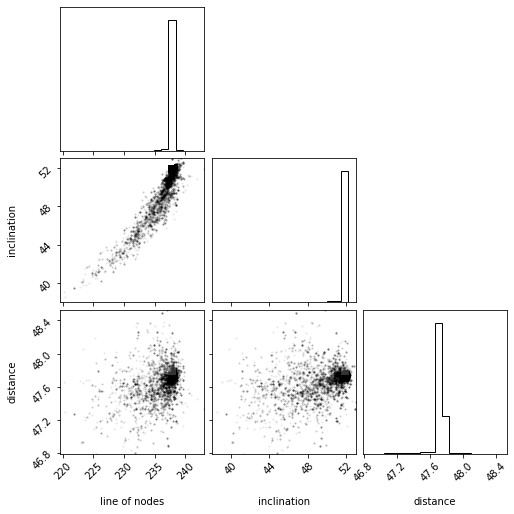

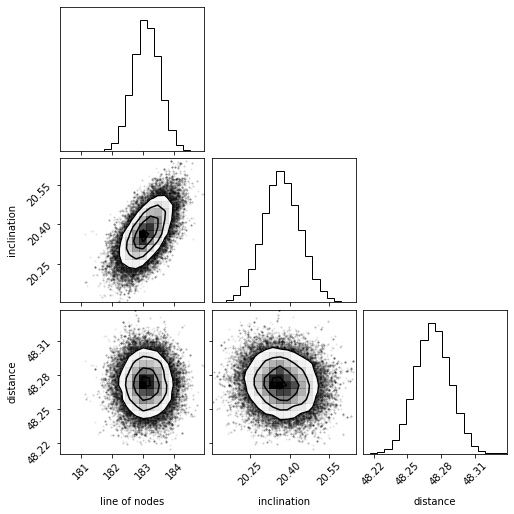

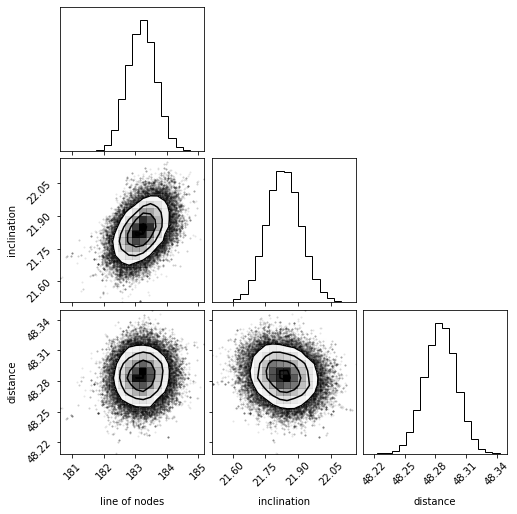

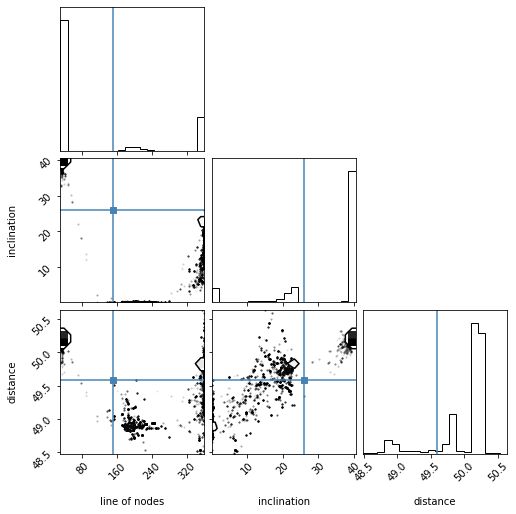

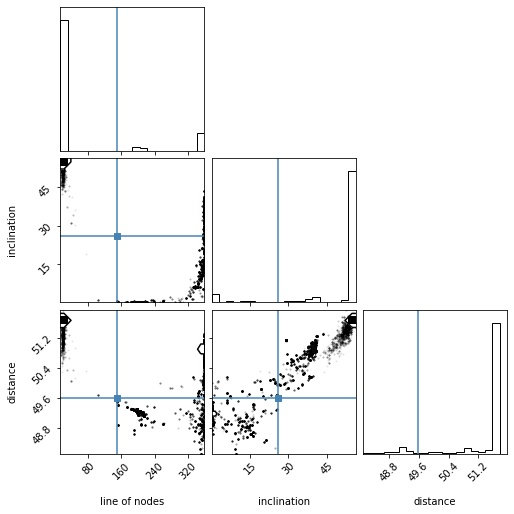

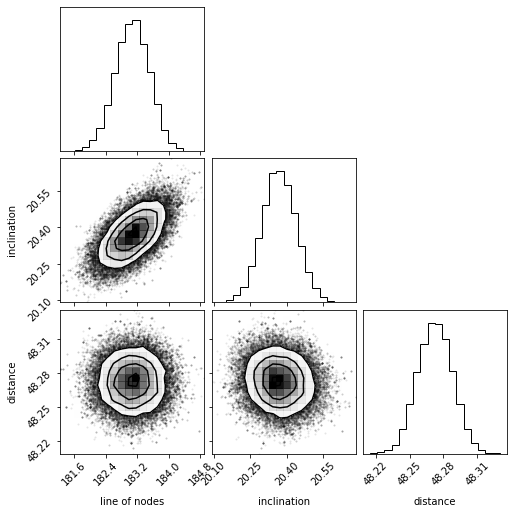

In [33]:
lmc1 = None
incs = np.zeros((5,5))
nodes = np.zeros((5,5))
thetas = np.linspace(0,np.pi,5)
phis = np.linspace(0,np.pi,5)
for i in range(0,5):
    for j in range(0,5):
        if lmc1 is None:
            out1,lmc1 = lmcinc(thetas[i],phis[j],returnlmc1=True)
        else:
            out1 = lmcinc(thetas[i],phis[j],lmc1=lmc1)
        ra = out1['RA']
        dec = out1['DEC']
        plx = out1['DIST']
        plx_err = plx/100
        labels = ['line of nodes','inclination','distance']
        
        pa_y = 149.23 # line of nodes from Yumi 
        io_y = 25.86 # inclination from Yumi 
        d0_g = 49.59 # distance from Pietrzynski (2019)


        #To run the MCMC:
        guess = [pa_y, io_y, d0_g] #guess parameters

        pos = guess + np.random.randn(100, 3) ## do each variable seperately with 100 walkers
        nwalkers, ndim = pos.shape

        sampler = emcee.EnsembleSampler(nwalkers, ndim, lnProb, args=(ra, dec, plx, plx_err))
        sampler.run_mcmc(pos, 1000, progress=True); #1000 samples

        #To create corner plot:
        flat_samples = sampler.get_chain(discard=100, thin=1, flat=True)
        corner.corner(flat_samples, labels=labels, truths=[pa_y, io_y, d0_g]);

        #To print the results:
        vals = [np.median(flat_samples[:,0]), np.median(flat_samples[:,1]), np.median(flat_samples[:,2])]
        incs[i,j] = vals[1]
        nodes[i,j] = vals[0]

In [34]:
incs

array([[19.64327488, 19.64147986, 19.64307676, 19.63987164, 19.64131343],
       [35.41500715, 39.46573805, 10.25034268, 21.65288437, 41.76798736],
       [60.31832708, 14.31345688, 29.82052128, 35.62879996, 29.59526035],
       [11.7590176 , 21.23025065, 63.76936911, 26.94123504, 52.01755866],
       [20.36831224, 21.83256202, 39.18386203, 54.22436996, 20.36864601]])

In [35]:
nodes

array([[176.5212484 , 176.5210229 , 176.49586043, 176.53104326,
        176.52910593],
       [ 90.78299829,  89.95380129,  98.87551604, 245.27714319,
        145.28966364],
       [266.20851979, 141.43450194, 132.05843259, 239.55737639,
        101.391852  ],
       [276.99711922, 103.79825172, 177.50526465, 222.17948032,
        238.13674211],
       [183.08922533, 183.19871381,  33.95910512,  19.46012795,
        183.07793017]])

Text(0.5, 1.0, 'Color is inclination')

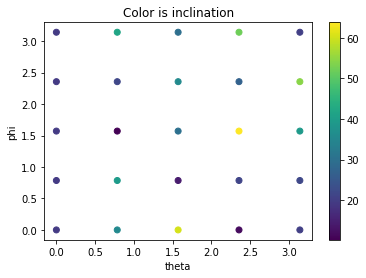

In [36]:
x = np.repeat(thetas,5)
y = np.reshape(np.repeat(thetas,5),(5,5)).T.flatten()
c = incs.flatten()
plt.scatter(x,y,c=c)
plt.colorbar()
plt.xlabel('theta')
plt.ylabel('phi')
plt.title('Color is inclination')

Text(0.5, 1.0, 'Color is line of nodes')

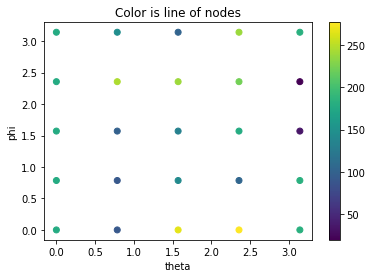

In [37]:
plt.scatter(x,y,c=nodes.flatten())
plt.colorbar()
plt.xlabel('theta')
plt.ylabel('phi')
plt.title('Color is line of nodes')